# DSC180b Capstone Project

## Importing Packages

In [1]:
import json
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# import torch as t  --> idk why this isn't being found, maybe memory issue
# import skmultilearn

# import biom
# from qiime2.plugins import feature_table
# from qiime2 import Artifact
# from qiime2.plugins.metadata.methods import distance_matrix


## Loading Data

In [3]:
## Obtaining file paths
with open("config/data-params.json") as fh:
    file_paths = json.load(fh)

In [5]:
raw_feature_table = pd.read_csv('data/raw/feature_table.csv').set_index('Unnamed: 0')
raw_feature_table.head()

,AACATAAGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGCCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAAACACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCATAAAGGGCGCGTAGGTGGTTTGTTAAGTCAGATGTGAAATGTAGGGGCTCAACCCCTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGAGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTCTGTTAAGTCAGATGTGAAAGGTTAGGGCTCAACCCTGAACGTGCATCTGATACTGGCAGACTTGAGTATGGAAGAGGTAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCAGTTTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGCCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCCGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,...,TTCGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGATCGTAGACGGCGAGACAAGTCTGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTGGAAACTGCCTTGCTAGAGTGCTGGAGAGGTAAGTGGAATTCCTAG,TTCGTAGGGGGCAAGCGTTGTCCGGAATGACTGGGCGTAAAGGGCGTGTAGGCGGCCTGATAAGTATGAAGTGAAAGTCCTGCTTTCAAGGTGGGAATTGCTTTGTAGACTGTCGGGCTTGAGTGCGGAAGAGGTAAGTGGAATTCCCAG,TTCGTAGGGGGCAAGCGTTGTCCGGAATGATTGGGCGTAAAGGGCGCGTAGGCGGCCTGCTAAGTCTGGAGTGAAAGTCCTGCTTTCAAGGTGGGAATTGCTTTGGATACTGGTGGGCTGGAGTGCAGGAGAGGAAAGCGGAATTACCGG,TTCGTAGGGGGCGAGCGTTATCCGGATTTATTGGGCGTAAAGCGTGCGTAGGCGGTTTATTAAGTCTAGAATTAAAGCCCGAGGCTTAACCTCGGTTCGTTCTAGATACTGGTTGACTAGAGTACAGTAGAGGCAAATGGAATTCCTAGT,TTCGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGAGCAGCAAGTCAGAAGTGAAATCTCTGGGCTCAACCCAGAAACTGCTTTTGAAACTGTTGCCCTTGAGTATCGGAGAGGCAGGCGGAATTCCTAG,TTCGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGGACGGCAAGTCAGGCGTGAAAACCATGGGCTCAACCCATGGCCTGCGTTTGAAACTGTTGTTCTTGAGTACTGGAGAGGTTGGCGGAATTCCTAG,TTCGTAGGTGGCGAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGGAATGCAAGTCAGATGTGAAATCCAGGGGCTTAACTCTTGAACTGCATTTGAAACTGTATTTCTTGAGTGTCGGAGAGGTTGACGGAATTCCTAG,TTCGTAGGTGGCGAGCGTTGTCCGGAATGACTGGGCGTAAAGGGAGCGTAGGCGGCACAACAAGTTAGGAGTGAAATACCGTGGCTTAACCACGGAACTGCTTTTAAAACTGTTGAGCTAGAGTGATGGAGAGGAAAGCGGAATTCCTAG,TTCGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGTGCGTAGGTGGCAGTGCAAGTCAGATGTGAAAGGCCGGGGCTCAACCCCGGAGCTGCATTTGAAACTGCATAGCTAGAGTACAGGAGAGGCAGGCGGAATTCCTAG,TTCGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTGTGTAAGTCTGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTGGAAACTATGCAGCTAGAGTGTCGGAGAGGTAAGTGGAATTCCCAG
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
11666.BLANK7.7B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.BLANK5.5B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.G0341A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.BLANK3.3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.BLANK5.5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
raw_metadata = pd.read_csv('data/raw/11666_metadata.txt', sep='\t', index_col=0)
raw_metadata.head()

/tmp/ipykernel_620/1082994228.py:1: DtypeWarning: Columns (1,2,3,4,6,7,8,10,11,12,13,14,17,18,19,20,25,26,27,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,55,56,57,61,62,63,64,65,66,67,69,70,71,72,73,75,76,78,80,82,83,84,85,86,87,88,89,90,91,92,95,98,99,102,103,104,105,106,107,108,109,111,119,121,122,123,124,125,126,127,128,129,130,131,132,133,134,136,138,139,141,142,143,144,145,146,147,148,152,153,155,156,157,160,164,165,168,169,170,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_metadata = pd.read_csv('data/raw/11666_metadata.txt', sep='\t', index_col=0)


,abdominal_obesity_idf_v2,abdominal_obesity_ncep_v2,ac_ratio_gt30,ac_ratio_gt30_v2,age_units,age_v2,agegroup_c6_nhanes_v2,agegroup_c6_v2,anonymized_name,antibiotic,...,taxon_id,title,type_stool,us_born_v2,weight_norm_overall_v2,weight_units,yes_no,yogurt,yrs_btwn_viv2,yrsus_c2_v2
sample_name,,,,,,,,,,,,,,,,,,,,,
11666.BLANK1.1A,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1A,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1A.ITS,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1A.ITS,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1B,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1B.ITS,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1B.ITS,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1C,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1C,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable


## Cleaning Metadata

Subset metadata based on existing samples in feature table

In [9]:
raw_metadata = raw_metadata.loc[raw_feature_table.index]

Keep relevant diseases (classes) and features in metadata

In [10]:
diseases_cols = {
    'abdominal_obesity_ncep_v2': 'obesity',
    'diabetes2_v2': 'diabetes',
    'dyslipidemia_v2': 'dyslipidemia',
    'hypertension2_v2': 'hypertension',
    'ckd_v2': 'ckd',
    'precvd_v2': 'precvd',
    'elevated_bp_selfmeds_v2': 'elevated_bp',
}
           
other_feature_cols = {
    'age_v2': 'age',
    'center': 'center',
    'gender': 'gender',
    'host_body_mass_index': 'BMI'
}

subset_cols = diseases_cols | other_feature_cols

metadata = raw_metadata[subset_cols.keys()].rename(columns=subset_cols)
metadata

,obesity,diabetes,dyslipidemia,hypertension,ckd,precvd,elevated_bp,age,center,gender,BMI
Unnamed: 0,,,,,,,,,,,
11666.BLANK7.7B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.BLANK5.5B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.G0341A,1,3,0,1,1,0,1,60,S,F,30.91403302
11666.BLANK3.3A,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.BLANK5.5E,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
...,...,...,...,...,...,...,...,...,...,...,...
11666.G1518B,1,3,0,1,1,0,1,55,S,F,28.83057985
11666.G1501A,0,3,1,1,3,0,1,63,C,M,27.14416896
11666.G1685A,1,2,0,0,1,0,0,51,C,F,30.61587754


Remove missing values

In [11]:
nan_rows = metadata[metadata.isna().any(axis=1)].index
na_rows = metadata[(metadata == 'not applicable').all(axis=1)].index
np_rows = metadata[(metadata == 'not provided').all(axis=1)].index
drop_rows = np.concatenate((nan_rows, na_rows, np_rows))

filtered_metadata = metadata.drop(drop_rows)
filtered_metadata

,obesity,diabetes,dyslipidemia,hypertension,ckd,precvd,elevated_bp,age,center,gender,BMI
Unnamed: 0,,,,,,,,,,,
11666.G0341A,1,3,0,1,1,0,1,60,S,F,30.91403302
11666.G0393A,1,2,0,1,1,0,1,68,C,F,23.44620183
11666.G0149A,0,1,0,0,1,0,0,50,S,F,23.75
11666.G0091A,1,2,0,0,2,0,1,69,S,F,25.859375
11666.G0377A,1,3,0,1,1,0,1,47,S,F,29.8684069
...,...,...,...,...,...,...,...,...,...,...,...
11666.G1518B,1,3,0,1,1,0,1,55,S,F,28.83057985
11666.G1501A,0,3,1,1,3,0,1,63,C,M,27.14416896
11666.G1685A,1,2,0,0,1,0,0,51,C,F,30.61587754


Map values in each class to binary. 1 in a column means a sample contains the corresponding disease, and 0 means it does not.

In [12]:
disease_metadata = filtered_metadata[diseases_cols.values()].astype(int)

for col in disease_metadata:
    print(col, disease_metadata[col].unique())

obesity [1 0]
diabetes [3 2 1]
dyslipidemia [0 1]
hypertension [1 0]
ckd [1 2 3 5 4]
precvd [0 1]
elevated_bp [1 0]


In [13]:
## DISEASE VALUE MAPS

diabetes_binary = {1: 0,
                   2: 0,
                   3: 1}
ckd_binary = {1: 0,
             2: 1,
             3: 1,
             4: 1,
             5: 1}

disease_metadata['diabetes'] = disease_metadata['diabetes'].map(diabetes_binary)
disease_metadata['ckd'] = disease_metadata['ckd'].map(ckd_binary)

diseases = disease_metadata
diseases.head()

,obesity,diabetes,dyslipidemia,hypertension,ckd,precvd,elevated_bp
Unnamed: 0,,,,,,,
11666.G0341A,1,1,0,1,0,0,1
11666.G0393A,1,0,0,1,0,0,1
11666.G0149A,0,0,0,0,0,0,0
11666.G0091A,1,0,0,0,1,0,1
11666.G0377A,1,1,0,1,0,0,1


## Cleaning Feature Table

Subset feature table based on existing samples in cleaned metadata

In [14]:
raw_feature_table = raw_feature_table.loc[diseases.index]

In [15]:
raw_feature_table.sum(axis=0).value_counts()

2.0       22484
1.0       19571
3.0        5057
4.0        1605
0.0        1213
          ...  
3521.0        1
870.0         1
2500.0        1
1040.0        1
4341.0        1
Length: 1399, dtype: int64

Remove noise by filtering out sequences that have fewer than 100,000 reads

In [16]:
threshold = 100_000
filtered_cols = raw_feature_table.sum(axis=0) > threshold
features = raw_feature_table.T.loc[filtered_cols].T
features

,AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGACCGGCAAGTTGGAAGTGAAAACTATGGGCTCAACCCATAAATTGCTTTCAAAACTGCTGGCCTTGAGTAGTGCAGAGGTAGGTGGAATTCCCGG,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGG,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGG,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAGAACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGG,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAACCCGCGGACGGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCGG,TACGGAAGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGGCTTTTAAGTCAGCGGTCAAATGTCGTGGCTCAACCATGTCAAGCCGTTGAAACTGTAAGCCTTGAGTCTGCACAGGGCACATGGAATTCGTGGT,TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGCAGGTTAAGCGTGTTGTGAAATGTAGGGGCTCAACCTCTGCACTGCAGCGCGAACTGGCTTGCTTGAGTACGCACAACGTGGGCGGAATTCGTGG,TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGG,TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGAGGCTCAACCTCTGCACTGCAGCGCGAACTGGTCTTCTTGAGTACGCACAACGTGGGCGGAATTCGTGG,TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGATGCTCAACATCTGAACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGG,...,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTCTGCAAGTCAGATGTGAAATCCATGGGCTCAACCCATGAACTGCATTTGAAACTGTAGATCTTGAGTGTCGGAGGGGCAATCGGAATTCCTAG,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGCCGGGAGGGCAAGTCAGATGTGAAATCCACGGGCTCAACTCGTGAACTGCATTTGAAACTACTCTTCTTGAGTATCGGAGAGGCAATCGGAATTCCTAG,TACGTAGGTGGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCATGTAGGCGGCTTAATAAGTCGAGCGTGAAAATGCGGGGCTCAACCCCGTATGGCGCTGGAAACTGTTAGGCTTGAGTGCAGGAGAGGAAAGGGGAATTCCCAGT,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCAGGCAAGTCAGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTTGAAACTGCAGGGCTAGAGTGCAGGAGGGGCAAGTGGAATTCCTAG,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCATGCAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGTAAGGCTAGAGTGCAGGAGGGGTGAGTGGAATTCCTAG,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCATGCAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGTAAGGCTGGAGTGCAGGAGGGGTGAGTGGAATTCCTAG,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGAAGGCTAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGGTCATCTAGAGTGTCGGAGGGGTAAGTGGAATTCCTAG,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTACGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGGACTAGAGTGTCGGAGGGGTAAGTGGAATTCCTAG,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGCGGAATTCCTAG,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGTGGAATTCCTAG
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
11666.G0341A,0.0,0.0,17.0,39.0,287.0,0.0,0.0,5.0,0.0,4.0,...,2.0,0.0,342.0,0.0,0.0,4.0,2.0,41.0,0.0,0.0
11666.G0393A,51.0,45.0,267.0,496.0,0.0,228.0,2.0,4.0,0.0,0.0,...,109.0,0.0,0.0,0.0,199.0,337.0,41.0,378.0,841.0,0.0
11666.G0149A,176.0,221.0,339.0,71.0,0.0,0.0,0.0,2398.0,0.0,3155.0,...,81.0,71.0,236.0,2.0,44.0,50.0,355.0,0.0,1104.0,0.0
11666.G0091A,22.0,245.0,1315.0,476.0,2.0,0.0,0.0,4.0,0.0,0.0,...,95.0,0.0,5.0,0.0,18.0,164.0,35.0,0.0,2793.0,0.0
11666.G0377A,3.0,140.0,507.0,65.0,205.0,93.0,0.0,352.0,0.0,185.0,...,161.0,65.0,7.0,0.0,52.0,54.0,115.0,0.0,223.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11666.G1518B,36.0,15.0,113.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,6.0,5.0,1.0,16.0,3.0
11666.G1501A,4.0,34.0,63.0,0.0,0.0,0.0,70.0,3127.0,97.0,53.0,...,287.0,660.0,398.0,11.0,2.0,25.0,6.0,0.0,304.0,0.0
11666.G1685A,18.0,332.0,215.0,590.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2

## Metadata EDA

In [17]:
eda_df = diseases.copy()
eda_df['total_diseases'] = eda_df.sum(axis=1) #how many diseases each sample has
eda_df.tail()

,obesity,diabetes,dyslipidemia,hypertension,ckd,precvd,elevated_bp,total_diseases
Unnamed: 0,,,,,,,,
11666.G1518B,1,1,0,1,0,0,1,4
11666.G1501A,0,1,1,1,1,0,1,5
11666.G1685A,1,0,0,0,0,0,0,1
11666.G1536A,1,1,0,1,1,1,1,6
11666.G1519B,0,1,0,1,0,0,1,3


<BarContainer object of 8 artists>

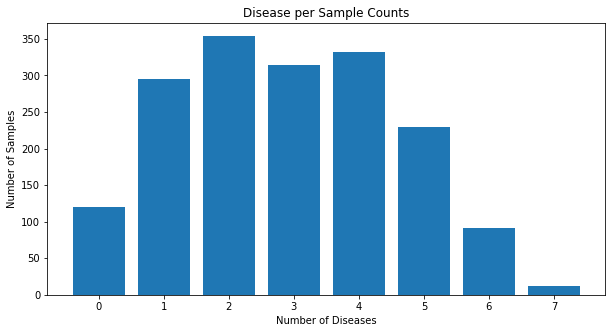

In [18]:
## DISEASE PER SAMPLE COUNTS

multiple_disease_counts = eda_df['total_diseases'].value_counts()

fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('Disease per Sample Counts')
ax.set_ylabel('Number of Samples')
ax.set_xlabel('Number of Diseases')
ax.bar(multiple_disease_counts.index, multiple_disease_counts.values)


<BarContainer object of 7 artists>

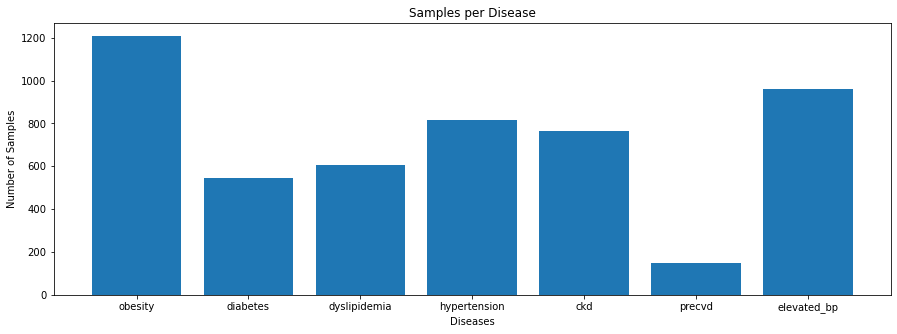

In [19]:
## SIZE OF EACH CLASS (DISEASE)

disease_counts = eda_df.drop(columns='total_diseases').sum(axis=0)

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Samples per Disease')
ax.set_ylabel('Number of Samples')
ax.set_xlabel('Diseases')
ax.bar(disease_counts.index, disease_counts.values)

## Data Preparation for Machine Learning

In [20]:
## In case we use pytorch

# setting device on GPU if available, else CPU
device = t.device('cuda' if t.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(t.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(t.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(t.cuda.memory_reserved(0)/1024**3,1), 'GB')

NameError: name 't' is not defined

Principal Coordinate Analysis (PCoA)

## Machine Learning Models

### Binary Relevance

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def init_gbc_model():
    loss='exponential'
    learning_rate=0.1 
    n_estimators=150 
    max_depth=3
    random_state=0
    
    clf = GradientBoostingClassifier(loss=loss, 
                                     learning_rate=learning_rate, 
                                     n_estimators=n_estimators, 
                                     max_depth=max_depth, 
                                     random_state=random_state)
    
    return clf



def init_skf():
    """Function for initializing the StratifiedKFold cross-validator

    Args:
        n_splits (int): Number of splits to seperate data
        shuffle (boolean): Wheter to shuffle data
        skf_random_state (int): random_state

    Returns:
        StratifiedKFold: Initialized StratifiedKFold cross-validator
    """
    n_splits=10
    random_state=0
    shuffle=True
    
    skf = StratifiedKFold(n_splits=n_splits,shuffle=shuffle, random_state=random_state)
    
    return skf

#Maybe build tuning pipeline later on

In [ ]:
classifiers = {}
metrics = {}

X = features
for i, disease in enumerate(diseases, start=1):
    skf = init_skf()
    clf = init_gbc_model()
    
    y = diseases[disease]
    
    best_acc = float('-inf')
    
    print('Training {} Classifier...'.format(disease))
    i=1
    for train_index, val_index in skf.split(X, y):
        
        train_X, train_y = X.iloc[train_index], y.iloc[train_index]
        val_X, val_y = X.iloc[val_index], y.iloc[val_index]

        clf.fit(train_X, train_y)
        
        preds = clf.predict(val_X)
#         preds = clf.predict_proba(val_X)[:,1] #predict probability of positive class predict
        
        acc = np.mean(preds==val_y)
        
        if acc >= best_acc:
            best_model = clf
            best_acc = acc
            
        print('Finished training split {}'.format(i))
        i+=1
        
    classifiers[disease] = best_model
    metrics[disease] = best_acc


In [ ]:
classifiers

In [ ]:
metrics

### Classifier Chain

### Label Powerset

### Adapted Algorithms